In [1]:
# Dependencies
from datetime import datetime
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import os

In [2]:
# load dataset (the data resource is from the Youtuber https://www.youtube.com/@jiejenn)
sales_data = pd.read_csv("./Resources/sales_data.csv")
sales_data

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,5/31/2018,6/14/2018,6/19/2018,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,5/31/2018,6/22/2018,7/2/2018,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,5/31/2018,6/21/2018,7/1/2018,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,5/31/2018,6/2/2018,6/7/2018,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,5/31/2018,6/16/2018,6/26/2018,USD,22,49,111,26,8,0.100,1822.4,1476.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,9/26/2020,12/30/2020,1/7/2021,1/14/2021,USD,9,41,339,29,1,0.075,234.5,121.940
7987,SO - 0008088,Online,WARE-NMK1003,9/26/2020,12/30/2020,1/2/2021,1/4/2021,USD,14,29,202,3,6,0.050,3202.6,1921.560
7988,SO - 0008089,Online,WARE-UHY1004,9/26/2020,12/30/2020,1/23/2021,1/26/2021,USD,14,32,241,35,5,0.200,3825.7,2792.761
7989,SO - 0008090,Online,WARE-NMK1003,9/26/2020,12/30/2020,1/20/2021,1/25/2021,USD,20,42,112,36,8,0.100,1072.0,804.000


In [3]:
# copy the sales data to prevent manipulating original file
df = sales_data.copy()
df

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,5/31/2018,6/14/2018,6/19/2018,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,5/31/2018,6/22/2018,7/2/2018,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,5/31/2018,6/21/2018,7/1/2018,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,5/31/2018,6/2/2018,6/7/2018,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,5/31/2018,6/16/2018,6/26/2018,USD,22,49,111,26,8,0.100,1822.4,1476.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,9/26/2020,12/30/2020,1/7/2021,1/14/2021,USD,9,41,339,29,1,0.075,234.5,121.940
7987,SO - 0008088,Online,WARE-NMK1003,9/26/2020,12/30/2020,1/2/2021,1/4/2021,USD,14,29,202,3,6,0.050,3202.6,1921.560
7988,SO - 0008089,Online,WARE-UHY1004,9/26/2020,12/30/2020,1/23/2021,1/26/2021,USD,14,32,241,35,5,0.200,3825.7,2792.761
7989,SO - 0008090,Online,WARE-NMK1003,9/26/2020,12/30/2020,1/20/2021,1/25/2021,USD,20,42,112,36,8,0.100,1072.0,804.000


In [4]:
# Print Data Types
df.dtypes

OrderNumber          object
Sales Channel        object
WarehouseCode        object
ProcuredDate         object
OrderDate            object
ShipDate             object
DeliveryDate         object
CurrencyCode         object
_SalesTeamID          int64
_CustomerID           int64
_StoreID              int64
_ProductID            int64
Order Quantity        int64
Discount Applied    float64
Unit Price          float64
Unit Cost           float64
dtype: object

In [5]:
# Change Customer Datatype to str
df['_CustomerID'] = df['_CustomerID'].astype(str)
print(df.dtypes)  # Verify the column's data type

OrderNumber          object
Sales Channel        object
WarehouseCode        object
ProcuredDate         object
OrderDate            object
ShipDate             object
DeliveryDate         object
CurrencyCode         object
_SalesTeamID          int64
_CustomerID          object
_StoreID              int64
_ProductID            int64
Order Quantity        int64
Discount Applied    float64
Unit Price          float64
Unit Cost           float64
dtype: object


In [6]:
# calculating revenue & profit margin and add to the dataframe
df['revenue'] = ((df['Unit Price'] - (df['Unit Price'] * df['Discount Applied']) - df['Unit Cost']) 
                 * df['Order Quantity'])
df['Profit Margine'] = df['revenue'] - df['Unit Cost']*df['Order Quantity']
df

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,revenue,Profit Margine
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,5/31/2018,6/14/2018,6/19/2018,USD,6,15,259,12,5,0.075,1963.1,1001.181,4073.4325,-932.4725
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,5/31/2018,6/22/2018,7/2/2018,USD,14,20,196,27,3,0.075,3939.6,3348.660,886.4100,-9159.5700
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,5/31/2018,6/21/2018,7/1/2018,USD,21,16,213,16,1,0.050,1775.5,781.220,905.5050,124.2850
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,5/31/2018,6/2/2018,6/7/2018,USD,28,48,107,23,8,0.075,2324.9,1464.687,5486.7640,-6230.7320
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,5/31/2018,6/16/2018,6/26/2018,USD,22,49,111,26,8,0.100,1822.4,1476.144,1312.1280,-10497.0240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,9/26/2020,12/30/2020,1/7/2021,1/14/2021,USD,9,41,339,29,1,0.075,234.5,121.940,94.9725,-26.9675
7987,SO - 0008088,Online,WARE-NMK1003,9/26/2020,12/30/2020,1/2/2021,1/4/2021,USD,14,29,202,3,6,0.050,3202.6,1921.560,6725.4600,-4803.9000
7988,SO - 0008089,Online,WARE-UHY1004,9/26/2020,12/30/2020,1/23/2021,1/26/2021,USD,14,32,241,35,5,0.200,3825.7,2792.761,1338.9950,-12624.8100
7989,SO - 0008090,Online,WARE-NMK1003,9/26/2020,12/30/2020,1/20/2021,1/25/2021,USD,20,42,112,36,8,0.100,1072.0,804.000,1286.4000,-5145.6000


In [7]:
# review what columns in the dataframe
df.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Price', 'Unit Cost', 'revenue',
       'Profit Margine'],
      dtype='object')

In [8]:
# extract the columns for RFM analysis 

columns = ['OrderNumber', '_CustomerID', 'OrderDate', 'revenue']
df_dataset = df[columns]

# Change the OrderDate column to datetime data type
df_dataset['OrderDate'] = pd.to_datetime(df_dataset['OrderDate'])

df_dataset.head()

C:\Users\sunjae youm\AppData\Local\Temp\ipykernel_3148\3455867093.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset['OrderDate'] = pd.to_datetime(df_dataset['OrderDate'])


,OrderNumber,_CustomerID,OrderDate,revenue
0,SO - 000101,15,2018-05-31,4073.4325
1,SO - 000102,20,2018-05-31,886.4100
2,SO - 000103,16,2018-05-31,905.5050
3,SO - 000104,48,2018-05-31,5486.7640
4,SO - 000105,49,2018-05-31,1312.1280


In [9]:
# get the max OrderDate to set the today's date

print(max(df['OrderDate']))

9/9/2020


In [10]:
# set the today_date (today_date can be vary according to the dataset)

today_date = pd.to_datetime('2021-01-01')
today_date

Timestamp('2021-01-01 00:00:00')

In [11]:
# RFM dataset
# Lambda functions in python is an anonymous function defined using the lambda keyword.
# Lambda arguments: expression
# Lambda: keyword to define an anonymous function.
# arguments: placeholders for input values, separated by commas (can be zero or more).
# expression: code to be executed and its result is automatically returned.

rfm_dataset = df_dataset.groupby('_CustomerID').agg({
        'OrderDate':lambda v: (today_date - v.max()).days, # Recency (days since last order)
        'OrderNumber': 'count',
        'revenue': 'sum'
})

rfm_dataset.rename(
    columns= {
        'OrderDate': 'recency',
        'OrderNumber': 'frequency',
        'revenue' : 'monetary'
    },
    inplace=True
)

rfm_dataset.head()

,recency,frequency,monetary
_CustomerID,,,
1,9,152,335933.6115
10,15,158,435122.1870
11,6,178,487614.2415
12,3,210,616719.2550
13,4,171,441003.2795


In [12]:
# use qcut function
# The pandas.qcut() function is used to bin data into equal-sized quantile-based bins.
# It is particularly useful for dividing continuous numerical data into categories based on percentiles

# Syntax:
# pd.qcut(x, q, labels=None)
# x -> The data sereis to be divided.
# q -> The number of quantiles (bins) or a list of quantile cut points
# labels (optional) -> Labels for the resulting bins

r = pd.qcut(rfm_dataset['recency'], q=5, labels=range(5, 0, -1)) # here, the higher the number, the lower the recency score 
f = pd.qcut(rfm_dataset['frequency'], q=5, labels=range(1, 6))
m = pd.qcut(rfm_dataset['monetary'], q=5, labels=range(1, 6))

# using the assign method to attach the R, F, M ranks to the rfm dataset
rfm = rfm_dataset.assign(R=r.values, F=f.values, M=m.values)
rfm.head()

,recency,frequency,monetary,R,F,M
_CustomerID,,,,,,
1,9,152,335933.6115,2,2,1
10,15,158,435122.1870,1,3,3
11,6,178,487614.2415,3,5,5
12,3,210,616719.2550,5,5,5
13,4,171,441003.2795,4,4,3


In [13]:
# concatenate the ranking scores to segment the customers
rfm['rfm_group'] = rfm[['R', 'F', 'M']].apply(lambda v: '-'.join(v.astype(str)), axis=1)
rfm['rfm_score_total'] = rfm[['R', 'F', 'M']].sum(axis=1)

rfm.head()

,recency,frequency,monetary,R,F,M,rfm_group,rfm_score_total
_CustomerID,,,,,,,,
1,9,152,335933.6115,2,2,1,2-2-1,5
10,15,158,435122.1870,1,3,3,1-3-3,7
11,6,178,487614.2415,3,5,5,3-5-5,13
12,3,210,616719.2550,5,5,5,5-5-5,15
13,4,171,441003.2795,4,4,3,4-4-3,11


In [14]:
rfm.dtypes

recency               int64
frequency             int64
monetary            float64
R                  category
F                  category
M                  category
rfm_group            object
rfm_score_total       int64
dtype: object

In [15]:
# find min and max of the rfm_score_total
print(rfm['rfm_score_total'].min())
print(rfm['rfm_score_total'].max())

4
15


In [16]:
# Separate rfm_score_total into 4 bins

# Define bin edges and labels
bins = [1, 4, 8, 12, float('inf')]  # 'inf' represents values greater than 13
labels = ['Cognitive', 'Affective', 'Conative', 'Action loyalty']

# Apply binning
rfm['loyalty_group'] = pd.cut(rfm['rfm_score_total'], bins=bins, labels=labels, right=True)

rfm.head()

,recency,frequency,monetary,R,F,M,rfm_group,rfm_score_total,loyalty_group
_CustomerID,,,,,,,,,
1,9,152,335933.6115,2,2,1,2-2-1,5,Affective
10,15,158,435122.1870,1,3,3,1-3-3,7,Affective
11,6,178,487614.2415,3,5,5,3-5-5,13,Action loyalty
12,3,210,616719.2550,5,5,5,5-5-5,15,Action loyalty
13,4,171,441003.2795,4,4,3,4-4-3,11,Conative


In [17]:
# Group by Loyalty
total_revenue = rfm['monetary'].sum()
total_customers = rfm['loyalty_group'].count()

rfm_monetary = rfm.groupby('loyalty_group').agg({
        'loyalty_group': 'count',
        'monetary': 'sum'
})

rfm_monetary['revenue(%)'] = (rfm_monetary['monetary'] / total_revenue) * 100
rfm_monetary['#(%)'] = (rfm_monetary['loyalty_group'] / total_customers) * 100
rfm_monetary.rename(columns={
    'monetary':'revenue($)',
    'loyalty_group':'#'
}, inplace=True)

rfm_monetary = rfm_monetary[['#','#(%)','revenue($)','revenue(%)']]

rfm_monetary.head()

C:\Users\sunjae youm\AppData\Local\Temp\ipykernel_3148\2581280217.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_monetary = rfm.groupby('loyalty_group').agg({


,#,#(%),revenue($),revenue(%)
loyalty_group,,,,
Cognitive,5,10.0,1.724942e+06,8.088703
Affective,17,34.0,6.557528e+06,30.749954
Conative,20,40.0,9.043296e+06,42.406364
Action loyalty,8,16.0,3.999561e+06,18.754979


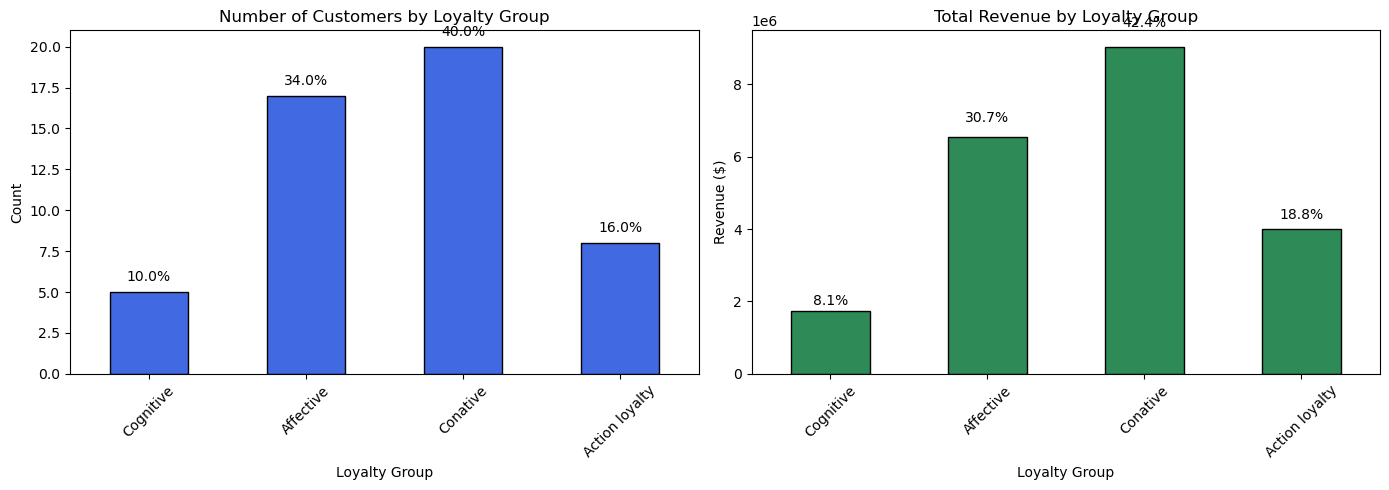

In [18]:
# Define figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# First bar chart: Number of customers ('#')
ax1 = rfm_monetary['#'].plot(kind='bar', color='royalblue', edgecolor='black', ax=axes[0])
axes[0].set_title("Number of Customers by Loyalty Group")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Loyalty Group")
axes[0].set_xticklabels(rfm_monetary.index, rotation=45)

# Annotate bars with percentage values
for i, value in enumerate(rfm_monetary['#']):
    percentage = rfm_monetary['#(%)'].iloc[i]
    ax1.text(i, value + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

# Second bar chart: Revenue ('revenue($)')
ax2 = rfm_monetary['revenue($)'].plot(kind='bar', color='seagreen', edgecolor='black', ax=axes[1])
axes[1].set_title("Total Revenue by Loyalty Group")
axes[1].set_ylabel("Revenue ($)")
axes[1].set_xlabel("Loyalty Group")
axes[1].set_xticklabels(rfm_monetary.index, rotation=45)

# Annotate bars with revenue percentage values
for i, value in enumerate(rfm_monetary['revenue($)']):
    percentage = rfm_monetary['revenue(%)'].iloc[i]
    ax2.text(i, value + value * 0.05, f'{percentage:.1f}%', ha='center', va='bottom')

# Show the plots
plt.tight_layout()
plt.show()


In [19]:
# Group by r, f, m

# Function to generate summary tables
def rfm_summary(df, column):
    total_count = len(df)
    total_monetary = df['monetary'].sum()
    
    summary = df.groupby(column).agg(
        count=(column, 'count'),
        revenue=('monetary', 'sum')
    ).reset_index()
    
    # Compute percentage columns
    summary['count(%)'] = (summary['count'] / total_count) * 100
    summary['revenue(%)'] = (summary['revenue'] / total_monetary) * 100
    
    return summary

# Generate tables for R, F, and M
rfm_r = rfm_summary(rfm, 'R')
rfm_f = rfm_summary(rfm, 'F')
rfm_m = rfm_summary(rfm, 'M')

# make tables in dataframe

r_summary = pd.DataFrame(rfm_r)
f_summary = pd.DataFrame(rfm_f)
m_summary = pd.DataFrame(rfm_m)


C:\Users\sunjae youm\AppData\Local\Temp\ipykernel_3148\3144767931.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(column).agg(
C:\Users\sunjae youm\AppData\Local\Temp\ipykernel_3148\3144767931.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(column).agg(
C:\Users\sunjae youm\AppData\Local\Temp\ipykernel_3148\3144767931.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  su

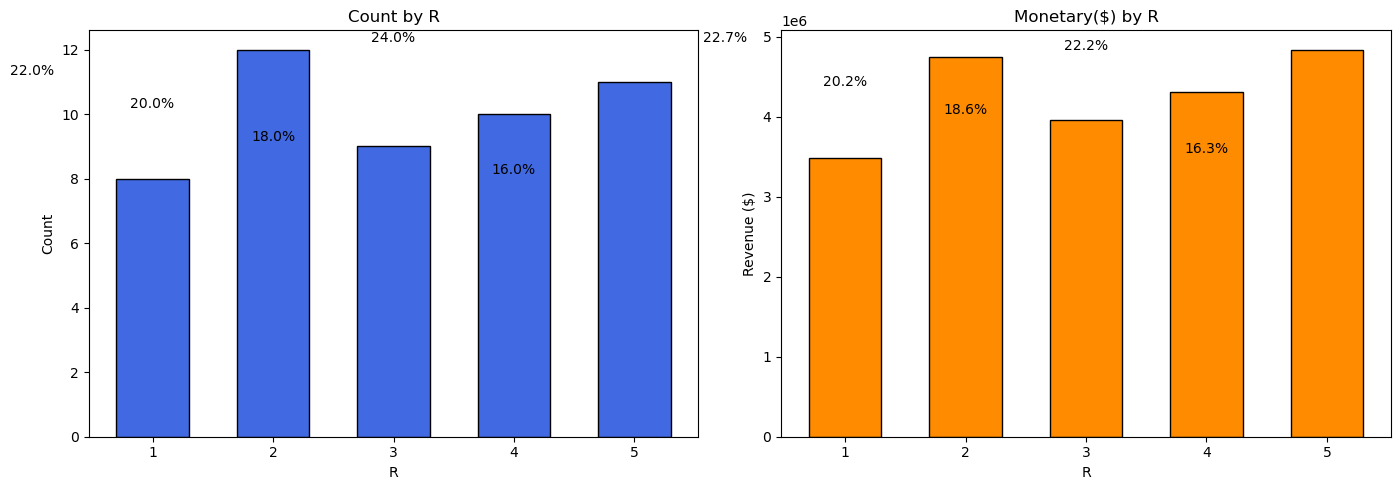

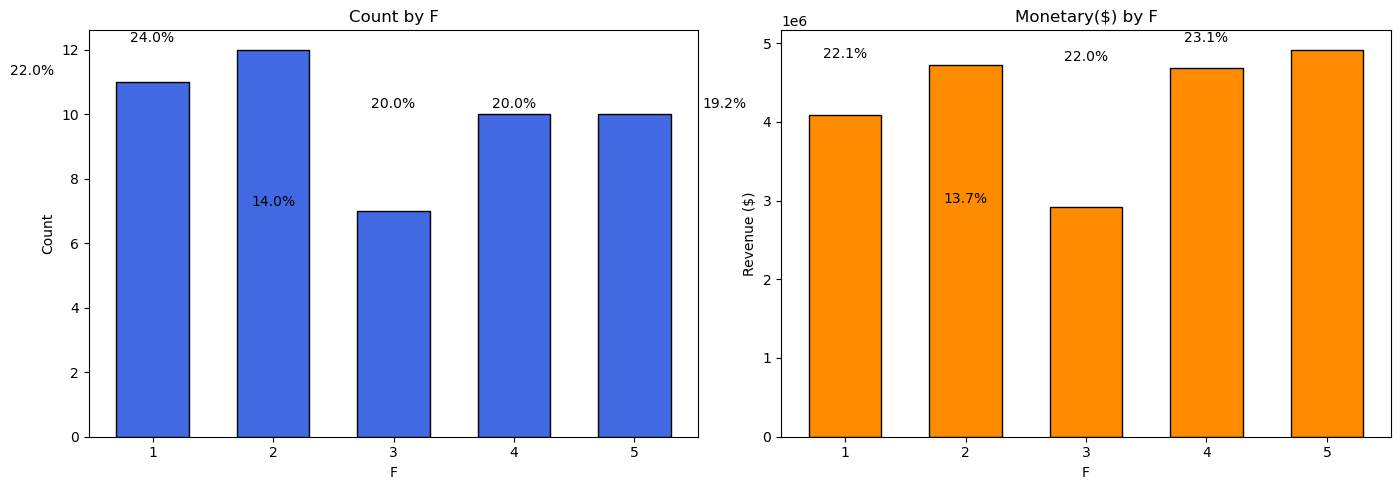

In [20]:
# Ensure the "Image" folder exists
os.makedirs("Images", exist_ok=True)

# Function to plot bar charts
def plot_bars(df, title, filename):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    bar_width = 0.6
    
    # Plot count
    axes[0].bar(df.iloc[:, 0], df['count'], label='Count', color='royalblue', edgecolor='black', width = bar_width)
    for i, v in enumerate(df['count']):
        axes[0].text(i, v * 1.02, f"{df['count(%)'][i]:.1f}%", ha='center', fontsize=10)
    axes[0].set_ylabel('Count')
    axes[0].set_xlabel(title)
    axes[0].set_title(f'Count by {title}')
    
    # Plot monetary($)
    axes[1].bar(df.iloc[:, 0], df['revenue'], label='Revenue($)', color='darkorange', edgecolor='black', width = bar_width)
    for i, v in enumerate(df['revenue']):
        axes[1].text(i, v * 1.02, f"{df['revenue(%)'][i]:.1f}%", ha='center', fontsize=10)
    axes[1].set_ylabel('Revenue ($)')
    axes[1].set_xlabel(title)
    axes[1].set_title(f'Monetary($) by {title}')
    
    plt.tight_layout()
    plt.savefig(f"Images/{filename}.png")
    plt.show()

# Generate bar charts and save them
plot_bars(r_summary, 'R', 'recency_bar_charts')
plot_bars(f_summary, 'F', 'frequency_bar_charts')


In [21]:
# Dependency for machine learning
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(rfm_dataset)

C:\Users\sunjae youm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sunjae youm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sunjae youm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sunjae youm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

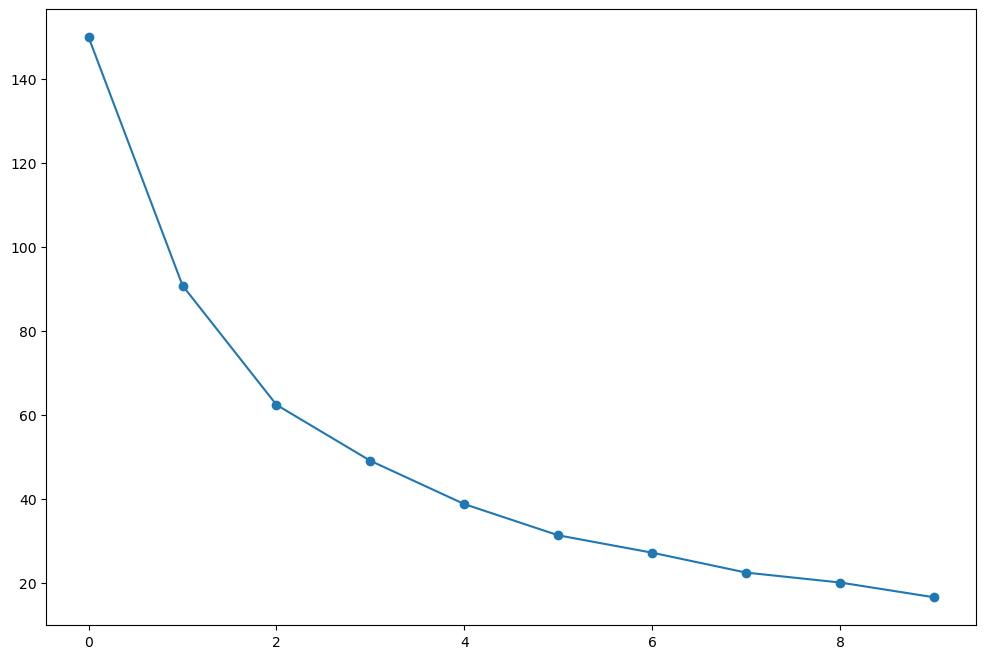

In [22]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")
plt.savefig(f"Images/elbow_curve.png")

In [23]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
rfm_dataset["Clusters"]=(kmeans.labels_+1)
rfm_dataset.head()

C:\Users\sunjae youm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sunjae youm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,recency,frequency,monetary,Clusters
_CustomerID,,,,
1,9,152,335933.6115,2
10,15,158,435122.1870,3
11,6,178,487614.2415,1
12,3,210,616719.2550,1
13,4,171,441003.2795,1


In [24]:
rfm_cluster = rfm_dataset.groupby("Clusters")[["recency", "frequency", "monetary"]].mean()
rfm_cluster

,recency,frequency,monetary
Clusters,,,
1,5.200000,172.050000,475955.610025
2,5.833333,149.125000,380348.688979
3,18.500000,161.833333,446307.736500


In [25]:
# define the function to segment customers to customer group I, II, III.
def customer_group(row):
    if row["Clusters"]==1:
        return 'Customer_I'
    elif row["Clusters"]==2:
        return 'Customer_II'
    else:
        return 'Customer_III'

In [26]:
rfm_dataset['Customer_Group']=rfm_dataset.apply(customer_group, axis=1)
rfm_dataset.head()

,recency,frequency,monetary,Clusters,Customer_Group
_CustomerID,,,,,
1,9,152,335933.6115,2,Customer_II
10,15,158,435122.1870,3,Customer_III
11,6,178,487614.2415,1,Customer_I
12,3,210,616719.2550,1,Customer_I
13,4,171,441003.2795,1,Customer_I


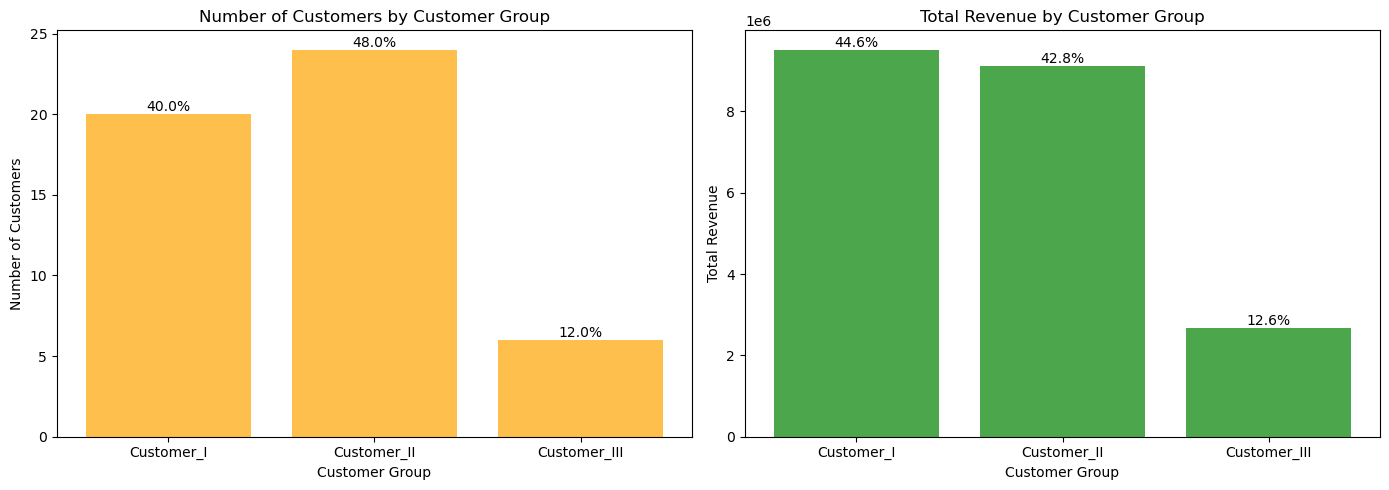

In [27]:
# Rename 'monetary' to 'revenue'
rfm_dataset = rfm_dataset.rename(columns={'monetary': 'revenue'})

# Group by 'Customer_Group'
grouped = rfm_dataset.groupby('Customer_Group').agg(
    total_revenue=('revenue', 'sum')  # Sum of revenue
).reset_index()

# Count the number of customers using index (_CustomerID)
grouped['customer_count'] = rfm_dataset.groupby('Customer_Group').size().values

# Calculate percentages
total_customers = grouped['customer_count'].sum()
total_revenue = grouped['total_revenue'].sum()
grouped['customer_percentage'] = (grouped['customer_count'] / total_customers) * 100
grouped['revenue_percentage'] = (grouped['total_revenue'] / total_revenue) * 100

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left subplot - Number of customers
bars1 = axes[0].bar(grouped['Customer_Group'], grouped['customer_count'], color='orange', alpha=0.7)
axes[0].set_title('Number of Customers by Customer Group')
axes[0].set_xlabel('Customer Group')
axes[0].set_ylabel('Number of Customers')

# Add percentage labels on bars
for bar, percentage in zip(bars1, grouped['customer_percentage']):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height, f'{percentage:.1f}%', ha='center', va='bottom')

# Right subplot - Total revenue
bars2 = axes[1].bar(grouped['Customer_Group'], grouped['total_revenue'], color='green', alpha=0.7)
axes[1].set_title('Total Revenue by Customer Group')
axes[1].set_xlabel('Customer Group')
axes[1].set_ylabel('Total Revenue')

# Add percentage labels on bars
for bar, percentage in zip(bars2, grouped['revenue_percentage']):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height, f'{percentage:.1f}%', ha='center', va='bottom')

# Adjust layout and save
plt.tight_layout()
plt.savefig('Images/customer_group_summary.png')
plt.show()

